In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

[nltk_data] Downloading package punkt to /home/jorgenv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* Load the data
* Change the txt into a csv file
* Remove the ‘Unnamed’ column
* Print the first 5 rows

In [2]:
data_df = pd.read_csv('./data/movie_reviews.txt')
data_df.head()

,Summary,Sentiment
0,rock destined st century new conan going make ...,1
1,gorgeously elaborate continuation lord ring tr...,1
2,effective tepid biopic,1
3,sometimes like go movie fun wasabi good place ...,1
4,emerges something rare issue movie honest keen...,1


I don't see a "Unnamed" column, so I'm just leaving it as is. And I'm not sure if by changing txt to csv you mean to just load as csv, but that's what I'm doing here.

* Set X as movie_data[‘Summary’] and y as movie_data[‘Sentiment’]
* Split the dataset into ‘docs_train’, ‘docs_test’, y_train, y_test. Test size is 20%

In [3]:
X = data_df['Summary']
y = data_df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Initialize CountVectorizer:
  * movieVzer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize)
  * Use all 25K words. Higher accuracy
* Locate the word `screen` and `Steven Seagal` in the corpus
* Determine the shape of `docs_train_counts`

In [4]:
movieVzer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize)

X_train_cv = movieVzer.fit_transform(X_train)
X_test_cv = movieVzer.transform(X_test)

In [5]:
X[X.str.contains('screen')]

8        steer turn snappy screenplay curl edge clever ...
62       disney always hit miss bringing beloved kid bo...
76              screenplay ingeniously constructed memento
96       normal screen process bromide would barely eno...
127          run walk see barbed bracing comedy big screen
                               ...                        
10482    koepp screenplay nearly surprising clever enou...
10522    writer dude think name uh michael zaidan suppo...
10526    spectator indeed sit open mouthed screen screa...
10635    film play thing nice n safe often play like mi...
10655    nelson screenplay need serious working show di...
Name: Summary, Length: 269, dtype: object

In [6]:
X[X.str.contains('Steven Seagal')]

Series([], Name: Summary, dtype: object)

In [7]:
# docs_train_counts
X_train_cv.shape

(8529, 7973)

* Convert raw frequency counts into Tfidf values
* Using the fitted vectorizer and transformer, transform the test data

In [8]:
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

* Use the Multinomial NB as a classifier
* Predict the test set results and determine the accuracy

In [9]:
mnb = MultinomialNB()
mnb.fit(X_train_tfidf,y_train)
y_pred = mnb.predict(X_test_tfidf)

score = accuracy_score(y_test, y_pred)
score

0.7538677918424754

* Provide the confusion matrix
* Provide the classification report

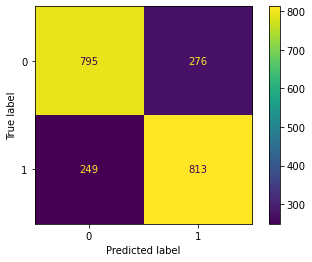

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1071
           1       0.75      0.77      0.76      1062

    accuracy                           0.75      2133
   macro avg       0.75      0.75      0.75      2133
weighted avg       0.75      0.75      0.75      2133



In [10]:
disp = plot_confusion_matrix(mnb, X_test_tfidf, y_test)
plt.show()

print(classification_report(y_test, y_pred))

* Use GridSearchCV with a logistic regression to identify accuracy, the best estimator, score and parameter. Use ‘scoring=roc_auc’ and ‘cv=5’
* Provide the confusion matrix

In [15]:
logistic_reg  = LogisticRegression(solver='liblinear')
grid_values = {'penalty': ['l1','l2'], 'C': np.logspace(-4, 4, 50)}

cv_model = GridSearchCV(
    estimator = logistic_reg,
    param_grid = grid_values,
    scoring = 'roc_auc',
    cv = 5,
    verbose = 0.1
)

cv_model.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   14.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.963...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=0.1)

0.7538677918424754


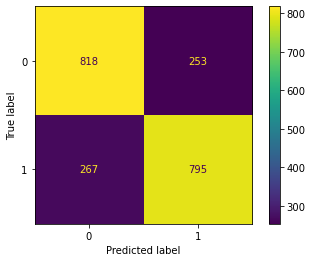

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1071
           1       0.75      0.77      0.76      1062

    accuracy                           0.75      2133
   macro avg       0.75      0.75      0.75      2133
weighted avg       0.75      0.75      0.75      2133



In [16]:
lg_y_pred = mnb.predict(X_test_tfidf)

print(accuracy_score(y_test, lg_y_pred))

lg_disp = plot_confusion_matrix(cv_model, X_test_tfidf, y_test)
plt.show()

print(classification_report(y_test, lg_y_pred))